In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
import pandas as pd

# Try reading the CSV file with different encodings
try:
    df = pd.read_csv(r'covid-liver1.csv', encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv(r'covid-liver1.csv', encoding='ISO-8859-1')


In [32]:
df

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size,...,Surveillance_programme,Surveillance_effectiveness,Mode_of_surveillance_detection,Time_diagnosis_1st_Tx,Date_incident_surveillance_scan,PS,Time_MDM_1st_treatment,Time_decisiontotreat_1st_treatment,Prev_known_cirrhosis,Months_from_last_surveillance
0,Y,Prepandemic,1,N,Surveillance,68,M,0FLD,Y,22,...,Y,Consistent,US,0.47,0,0,0.70,0.00,Y,7.333333
1,Y,Prepandemic,1,N,Surveillance,70,M,ARLD,Y,40,...,Y,Consistent,US,0.00,0,2,0.00,0.00,Y,4.033333
2,Y,Prepandemic,1,N,Surveillance,64,M,ARLD,Y,52,...,Y,Consistent,US,0.00,0,0,0.00,0.00,Y,5.900000
3,Y,Prepandemic,1,N,Incidental,73,M,ARLD,Y,80,...,N,0,0,0.00,0,2,0.00,0.00,Y,0.000000
4,Y,Prepandemic,1,N,Incidental,66,F,ARLD,Y,60,...,N,0,0,0.00,0,0,0.00,0.00,Y,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,N,Pandemic,12,0,Symptomatic,72,F,0,0,0,...,0,0,0,0.00,0,1,0.00,0.00,Y,0.000000
446,N,Pandemic,12,0,Symptomatic,63,M,0,0,75,...,0,0,0,2.93,0,0,1.63,1.63,Y,0.000000
447,N,Pandemic,12,0,Symptomatic,79,F,0,0,63,...,0,0,0,0.00,0,1,0.00,0.00,Y,0.000000
448,N,Pandemic,12,0,Symptomatic,84,F,0,0,65,...,0,0,0,0.00,0,2,0.00,0.00,Y,0.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cancer                              450 non-null    object 
 1   Year                                450 non-null    object 
 2   Month                               450 non-null    int64  
 3   Bleed                               450 non-null    object 
 4   Mode_Presentation                   450 non-null    object 
 5   Age                                 450 non-null    int64  
 6   Gender                              450 non-null    object 
 7   Etiology                            450 non-null    object 
 8   Cirrhosis                           450 non-null    object 
 9   Size                                450 non-null    int64  
 10  HCC_TNM_Stage                       450 non-null    object 
 11  HCC_BCLC_Stage                      450 non-n

In [34]:
df.isnull().sum()

Cancer                                0
Year                                  0
Month                                 0
Bleed                                 0
Mode_Presentation                     0
Age                                   0
Gender                                0
Etiology                              0
Cirrhosis                             0
Size                                  0
HCC_TNM_Stage                         0
HCC_BCLC_Stage                        0
ICC_TNM_Stage                         0
Treatment_grps                        0
Survival_fromMDM                      0
Alive_Dead                            0
Type_of_incidental_finding            0
Surveillance_programme                0
Surveillance_effectiveness            0
Mode_of_surveillance_detection        0
Time_diagnosis_1st_Tx                 0
Date_incident_surveillance_scan       0
PS                                    0
Time_MDM_1st_treatment                0
Time_decisiontotreat_1st_treatment    0


In [35]:
df.nunique()

Cancer                                  2
Year                                    2
Month                                  12
Bleed                                   3
Mode_Presentation                       3
Age                                    54
Gender                                  2
Etiology                                9
Cirrhosis                               3
Size                                   95
HCC_TNM_Stage                           5
HCC_BCLC_Stage                          5
ICC_TNM_Stage                           5
Treatment_grps                          8
Survival_fromMDM                      307
Alive_Dead                              2
Type_of_incidental_finding              5
Surveillance_programme                  3
Surveillance_effectiveness              4
Mode_of_surveillance_detection          4
Time_diagnosis_1st_Tx                  93
Date_incident_surveillance_scan         3
PS                                      5
Time_MDM_1st_treatment            

In [36]:
df.Size.value_counts()

Size
0      50
20     17
40     16
100    15
14     13
       ..
12      1
96      1
41      1
72      1
63      1
Name: count, Length: 95, dtype: int64

<Axes: >

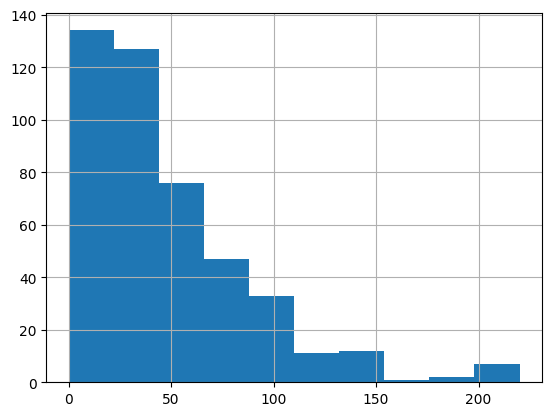

In [37]:
df.Size.hist()

<Axes: >

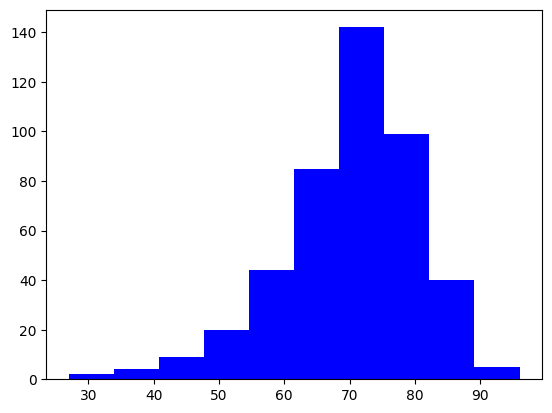

In [38]:
df.Age.hist(color='blue', grid=False)

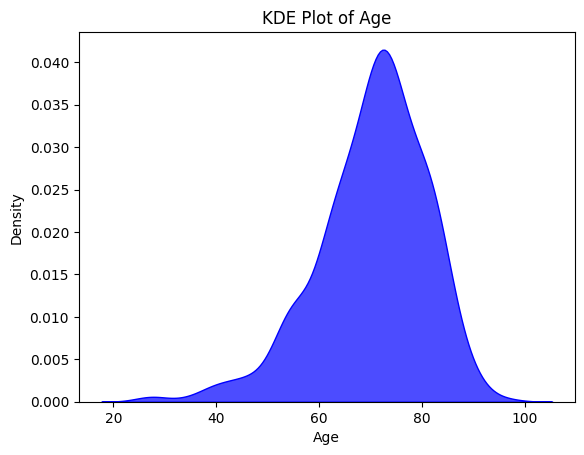

In [39]:
sns.kdeplot(df.Age, fill=True, color='blue', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age')

plt.show()

In [43]:
r, p = stats.pearsonr(df.Age, df.Size)

In [44]:
r, p

(0.06740811914465789, 0.15341015065143146)

In [45]:
df.Alive_Dead.describe()

count      450
unique       2
top       Dead
freq       264
Name: Alive_Dead, dtype: object

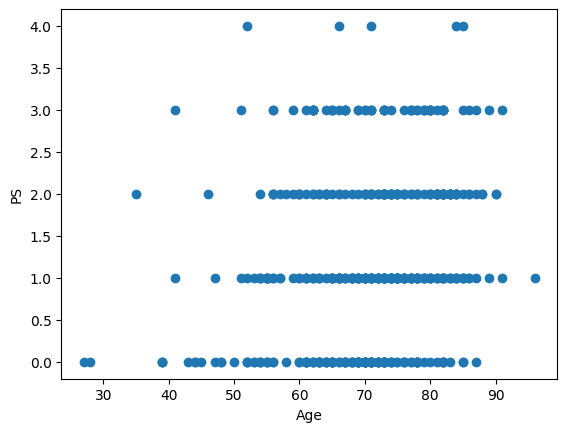

In [48]:
plt.scatter(df.Age, df.PS)

plt.xlabel('Age')
plt.ylabel('PS')
plt.show()

In [49]:
df_sampled = df.sample(2)

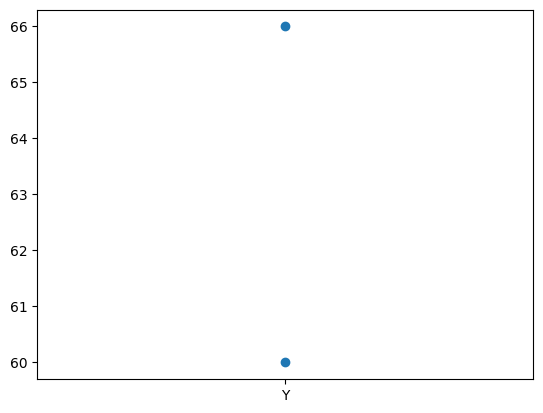

In [55]:
plt.scatter(df_sampled.Cancer, df_sampled.Age)

In [57]:
df_male = df[df['Gender']== 'M']
df_female = df[df['Gender']== 'F']

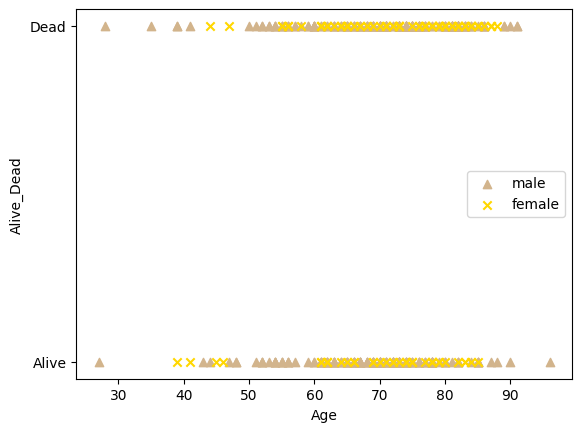

In [61]:
plt.scatter(df_male.Age, df_male.Alive_Dead, marker='^', color='tan', label='male')
plt.scatter(df_female.Age, df_female.Alive_Dead, marker='x', color='gold', label='female')

plt.legend()
plt.xlabel('Age')
plt.ylabel('Alive_Dead')
plt.show()


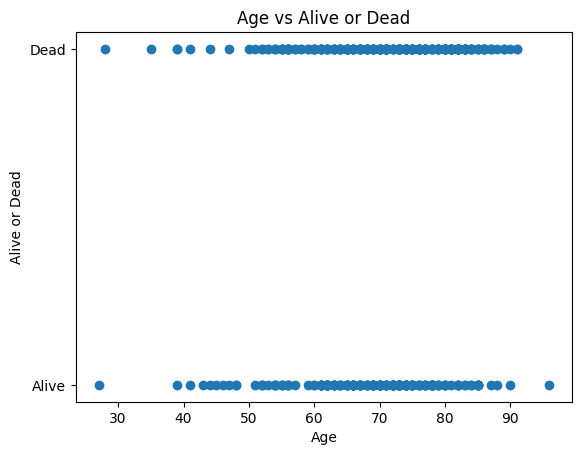

In [64]:
plt.scatter(df.Age, df.Alive_Dead)

plt.title('Age vs Alive or Dead')
plt.xlabel('Age')
plt.ylabel('Alive or Dead')
plt.show()

In [66]:
x = range(df.Age.min(), df.Age.max())

In [67]:
x

range(27, 96)

In [70]:
df.Size.describe()


count    450.000000
mean      47.426667
std       41.518935
min        0.000000
25%       20.000000
50%       36.000000
75%       66.500000
max      220.000000
Name: Size, dtype: float64

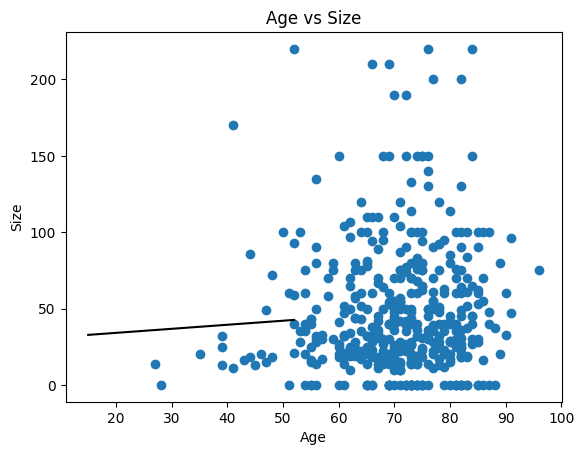

In [74]:
m, b, r, p, err = stats.linregress(df.Age, df.Size)

x = range(15, 53)
y = m * x + b

plt.plot(x, y, color='black')
plt.scatter(df.Age, df.Size)

plt.title('Age vs Size')
plt.xlabel('Age')
plt.ylabel('Size')
plt.show()

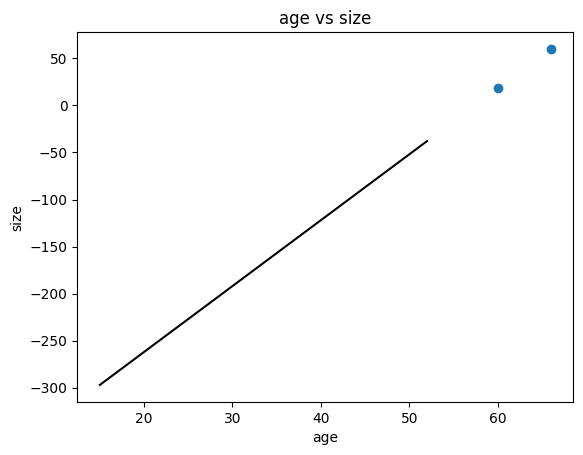

In [75]:
m, b, r, p, err = stats.linregress(df_sampled.Age, df_sampled.Size)

x = range(15, 53)
y = m * x + b

plt.plot(x, y, color='black')
plt.scatter(df_sampled.Age, df_sampled.Size)

plt.title('age vs size')
plt.xlabel('age')
plt.ylabel('size')
plt.show()